In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, read_csv
from arviz import hdi
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Model 1: Unidimensional model of maltreatment

### 1.1 Model parameters

In [20]:
## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
for i, study in enumerate(studies):
    if i: print('')
    print(f'study = {study}')

    ## Load samples.
    samples = read_csv(os.path.join('stan_results', study, 'grmq_m1.tsv.gz'), sep='\t', compression='gzip')
    
    for param in ['alpha','lambda']:
        
        ## Extract parameters.
        arr = samples.filter(regex=param).values
        
        ## Summarize across items.
        mu = arr.mean(axis=1).mean(); lb, ub = hdi(arr.mean(axis=1), hdi_prob=0.95)
        print('%s_mu:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

        ## Summarize least discriminating.
        ix = np.argmin(arr.mean(axis=0))
        mu = arr[:,ix].mean(); lb, ub = hdi(arr[:,ix], hdi_prob=0.95)
        print('%s_min:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

        ## Summarize most discriminating.
        ix = np.argmax(arr.mean(axis=0))
        mu = arr[:,ix].mean(); lb, ub = hdi(arr[:,ix], hdi_prob=0.95)
        print('%s_max:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

study = teicher2015
alpha_mu:	1.357 [1.295, 1.414]
alpha_min:	0.506 [0.067, 0.901]
alpha_max:	2.944 [2.505, 3.392]
lambda_mu:	0.597 [0.579, 0.614]
lambda_min:	0.279 [0.039, 0.468]
lambda_max:	0.864 [0.829, 0.895]

study = tuominen2022
alpha_mu:	1.349 [1.272, 1.422]
alpha_min:	0.657 [0.443, 0.864]
alpha_max:	2.407 [1.982, 2.873]
lambda_mu:	0.600 [0.578, 0.621]
lambda_min:	0.359 [0.256, 0.457]
lambda_max:	0.814 [0.763, 0.863]


### 1.2 Comparison across datasets

In [44]:
for param in ['alpha','lambda']:

    ## Load item parameters (teicher2015).
    a1 = read_csv(os.path.join('stan_results', 'teicher2015', 'grmq_m1.tsv.gz'), sep='\t', 
                  compression='gzip').filter(regex=param).values

    ## Load item parameters (tuominen2022).
    a2 = read_csv(os.path.join('stan_results', 'tuominen2022', 'grmq_m1.tsv.gz'), sep='\t', 
                  compression='gzip').filter(regex=param).values

    ## Compute RMSE.
    rmse = np.square(np.mean(np.square(a1 - a2), axis=1))
    mu = rmse.mean(); lb, ub = hdi(rmse, hdi_prob=0.95)
    print('%s:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

alpha:	0.038 [0.014, 0.068]
lambda:	0.000 [0.000, 0.000]


In [13]:
poly = read_csv('stan_results/polychoric.csv')

for study in ['teicher2015', 'tuominen2022']:
    corr = poly.pivot_table(study, 'k1', 'k2').values
    _, eig, _ = np.linalg.svd(corr)
    print(eig.round(1)[:4])

[14.6  3.8  2.6  2.1]
[13.3  4.4  2.5  2. ]


## Model 2: Unidimensional model of maltreatment

### 1.1 Model parameters (general factor)

In [91]:
## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
for i, study in enumerate(studies):
    if i: print('')
    print(f'study = {study}')

    ## Load samples.
    samples = read_csv(os.path.join('stan_results', study, 'grmq_m2.tsv.gz'), sep='\t', compression='gzip')
    
    for param in ['alpha','lambda']:
        
        ## Extract parameters.
        arr = samples.filter(regex=f'{param}\[[0-9]*,1\]').values
        
        ## Summarize across items.
        mu = arr.mean(axis=1).mean(); lb, ub = hdi(arr.mean(axis=1), hdi_prob=0.95)
        print('%s_mu:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

        ## Summarize least discriminating.
        ix = np.argmin(arr.mean(axis=0))
        mu = arr[:,ix].mean(); lb, ub = hdi(arr[:,ix], hdi_prob=0.95)
        print('%s_min:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

        ## Summarize most discriminating.
        ix = np.argmax(arr.mean(axis=0))
        mu = arr[:,ix].mean(); lb, ub = hdi(arr[:,ix], hdi_prob=0.95)
        print('%s_max:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

study = teicher2015
alpha_mu:	1.503 [1.433, 1.579]
alpha_min:	0.470 [0.000, 0.830]
alpha_max:	4.248 [3.464, 4.996]
lambda_mu:	0.575 [0.556, 0.593]
lambda_min:	0.235 [0.000, 0.412]
lambda_max:	0.864 [0.829, 0.898]

study = tuominen2022
alpha_mu:	1.524 [1.434, 1.614]
alpha_min:	0.686 [0.430, 0.929]
alpha_max:	3.510 [2.364, 4.692]
lambda_mu:	0.580 [0.560, 0.601]
lambda_min:	0.299 [0.205, 0.393]
lambda_max:	0.827 [0.770, 0.877]


### 1.2 Model parameters (specific factors)

In [100]:
## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
for i, study in enumerate(studies):
    if i: print('')
    print(f'study = {study}')

    ## Load samples.
    samples = read_csv(os.path.join('stan_results', study, 'grmq_m2.tsv.gz'), sep='\t', compression='gzip')
    
    for param in ['alpha','lambda']:
                
        ## Extract parameters.
        arr = samples.filter(regex=f'{param}\[[0-9]*,[^1]|lambda\[[0-9]*,1[0-2]').values
        
        ## Summarize across items.
        mu = arr.mean(axis=1).mean(); lb, ub = hdi(arr.mean(axis=1), hdi_prob=0.95)
        print('%s_mu:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

        ## Summarize least discriminating.
        ix = np.argmin(arr.mean(axis=0))
        mu = arr[:,ix].mean(); lb, ub = hdi(arr[:,ix], hdi_prob=0.95)
        print('%s_min:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

        ## Summarize most discriminating.
        ix = np.argmax(arr.mean(axis=0))
        mu = arr[:,ix].mean(); lb, ub = hdi(arr[:,ix], hdi_prob=0.95)
        print('%s_max:\t%0.3f [%0.3f, %0.3f]' %(param, mu, lb, ub))

study = teicher2015
alpha_mu:	0.804 [0.738, 0.873]
alpha_min:	0.035 [0.000, 0.113]
alpha_max:	2.916 [2.325, 3.589]
lambda_mu:	0.313 [0.285, 0.341]
lambda_min:	0.014 [0.000, 0.046]
lambda_max:	0.797 [0.743, 0.851]

study = tuominen2022
alpha_mu:	0.903 [0.821, 0.977]
alpha_min:	0.090 [0.000, 0.240]
alpha_max:	3.135 [1.822, 4.456]
lambda_mu:	0.343 [0.315, 0.369]
lambda_min:	0.043 [0.000, 0.138]
lambda_max:	0.698 [0.606, 0.788]


### 2.1 Relative parameter bias

In [99]:
## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
for i, study in enumerate(studies):
    
    l1 = read_csv(os.path.join('stan_results', study, 'grmq_m1.tsv.gz'), sep='\t', 
                  compression='gzip').filter(regex=f'lambda\[[0-9]*,1\]').values
    l2 = read_csv(os.path.join('stan_results', study, 'grmq_m2.tsv.gz'), sep='\t', 
                  compression='gzip').filter(regex=f'lambda\[[0-9]*,1\]').values
    
    ## Compute relative bias.
    bias = np.median((l1 - l2) / l2, axis=1)
    mu = np.median(bias); lb, ub = hdi(bias, hdi_prob=0.95)
    print('%s:\t%0.3f [%0.3f, %0.3f]' %(study, mu, lb, ub))

teicher2015:	0.021 [-0.024, 0.066]
tuominen2022:	0.027 [-0.026, 0.080]


## Section 1: Posterior Predictive Model Checking

### 1.1 RMSEA

In [2]:
from arviz import hdi

## Load RMSEA.
rmsea = read_csv(os.path.join('stan_results', 'RMSEA.csv'))

## Construct summary table.
summary = rmsea.apply(lambda x: hdi(x.values, hdi_prob=0.95)).T
summary.columns = ['2.5%','97.5%']
summary.insert(0, '50%', rmsea.median())

summary.round(3)

,50%,2.5%,97.5%
teicher2015_1,0.039,0.034,0.044
teicher2015_2,0.037,0.031,0.043
teicher2015_3,0.039,0.034,0.044
teicher2015_4,0.037,0.031,0.042
tuominen2022_1,0.043,0.035,0.049
tuominen2022_2,0.043,0.035,0.050
tuominen2022_3,0.041,0.033,0.047
tuominen2022_4,0.041,0.033,0.049


### 1.2 Observed score distribution

In [ ]:
from arviz import hdi

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']
models = [1,2,3,4]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
nrow = len(studies)
ncol = len(models)
fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*4,nrow*4), sharex=True, sharey=True)
axes = np.atleast_2d(axes)

## Preallocate space.
ppmc1 = []

for j, m in enumerate(models):
    
    for i, study in enumerate(studies):

        ## Load posterior predictive check.
        df = read_csv(os.path.join('stan_results', study, f'grmq_m{m}_ppmc1.csv'), index_col=0)

        ## Normalize counts across samples.
        df.loc[:,:] /= df.loc[0].values.sum()

        ## Extract values.
        NC  = df.values[0]
        NCr = df.values[1:]
        ENC = NCr.mean(axis=0)

        ## Compute 95% HDI.
        lb, ub = np.apply_along_axis(hdi, 0, NCr, hdi_prob=0.95)

        ## Compute chi-square statistics.
        xi = np.sum(np.divide(np.square(NC - ENC), ENC, where=ENC > 0))
        xr = np.divide(np.square(NCr - ENC), ENC, where=ENC > 0).sum(axis=1)

        ## Compute ppp-value.
        pppv = (xi >= xr).mean()

        ## Store statistics.
        ppmc1.append(dict(study=study, model=m, xi=xi, xr=xr.mean(), pval=pppv))
        
        ## Plot observed scores and 95% HDI.
        axes[i,j].plot(np.arange(NC.size), NC, 'o-', color='k', lw=1, markersize=4)    
        axes[i,j].fill_between(np.arange(NC.size), lb, ub, color='0.5', alpha=0.2)

        ## Add detail.
        axes[i,j].set(xticks=np.arange(0,51,10), xlabel='Observed scores', 
                      yticks=np.arange(0,0.09,0.02), yticklabels=np.arange(0,9,2),
                      ylabel='', title=study)
        if not j: axes[i,j].set_ylabel('Percent sample')

        ## Add annotations.
        axes[i,j].annotate(r'$\chi^2$ = %0.3f (p = %0.3f)' %(xi, pppv), (0,0), (0.97, 0.97), 
                           xycoords='axes fraction', ha='right', va='top', fontsize=14)
    
## Convert to DataFrame.
ppmc1 = DataFrame(ppmc1).sort_values(['study', 'model']).set_index(['study','model'])
ppmc1 = ppmc1.round(3)
    
sns.despine()
plt.tight_layout()

### 1.3 SGDDM

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']
models = [1,2,3,4]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
ppmc2 = []

for j, m in enumerate(models):
    
    for i, study in enumerate(studies):

        ## Load posterior predictive check.
        df = read_csv(os.path.join('stan_results', study, f'grmq_m{m}_ppmc2.csv'), index_col=0)
        
        ## Extract statistics.
        sgddm, sgddmr, pppv = df.loc[0, ['obs', 'pred', 'pval']]
        
        ## Append.
        ppmc2.append(dict(study=study, model=m, sgddm=sgddm, sgddmr=sgddmr, pval=pppv))
        
## Convert to DataFrame.
ppmc2 = DataFrame(ppmc2).sort_values(['study', 'model']).set_index(['study','model'])
ppmc2 = ppmc2.round(3)

## Display DataFrame.
ppmc2

### 1.4 $Q_3$ indices

In [13]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']
models = [1,2,3,4]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

Q3 = read_csv('stan_results/Q3.csv')
    
for i, study in enumerate(studies):
        
    for j, m in enumerate(models):
        
        ## Restrict to study / model of interest.
        df = Q3.query(f'study == "{study}" and model == {m}')
        
        ## Print info.
        print('M%s: Q3 = %0.3f (%s)' %(m, df.Q3_99.max(), np.sum(df.Q3 > df.Q3_99.max())))


M1: Q3 = 0.239 (25)
M2: Q3 = 0.300 (10)
M3: Q3 = 0.255 (16)
M4: Q3 = 0.279 (8)
M1: Q3 = 0.250 (21)
M2: Q3 = 0.310 (4)
M3: Q3 = 0.316 (5)
M4: Q3 = 0.318 (1)


## Section 2: Model Comparison

In [ ]:
from itertools import combinations

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']
models = [1,2,3,4]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
ppmc0 = []

for study in studies:

    for m in models:
        
        ## Load data.
        df = read_csv(os.path.join('stan_results', study, f'grmq_m{m}_ppmc0.csv'))
        
        ## Compute LOO-CV.
        loo = -2 * df.loo.sum()
        
        ## Append.
        ppmc0.append(dict(study=study, model=m, loo=loo))
        
## Convert to DataFrame.
ppmc0 = DataFrame(ppmc0).sort_values(['study', 'model']).set_index(['study','model']).round(1)

## Iteratively add comparison.
ppmc0['delta'] = '-'
for study in studies:
    
    ## Load winning model.
    x = read_csv(os.path.join('stan_results', study, f'grmq_m4_ppmc0.csv'))
    
    for m in [1,2,3]:
        
        ## Load alternate model.
        y = read_csv(os.path.join('stan_results', study, f'grmq_m{m}_ppmc0.csv'))
        
        ## Compute delta-LOO.
        arr = (-2*x.loo) - (-2*y.loo)
        mu = np.sum(arr)
        se = np.std(arr) * np.sqrt(len(x))
        
        ## Store.
        ppmc0.loc[(study,m),'delta'] = '%0.1f (%0.1f)' %(mu, se)
    
## Display DataFrame.
ppmc0

## Section 3: Tables

### 3.1 Table 1

In [ ]:
## Merge DataFrames.
table = ppmc1.merge(ppmc2, left_index=True, right_index=True)
table = table.merge(ppmc0, left_index=True, right_index=True)

## Display DataFrame.
table

In [ ]:
## Convert to Latex.
print(table.to_latex())

### 3.2 Figure 1

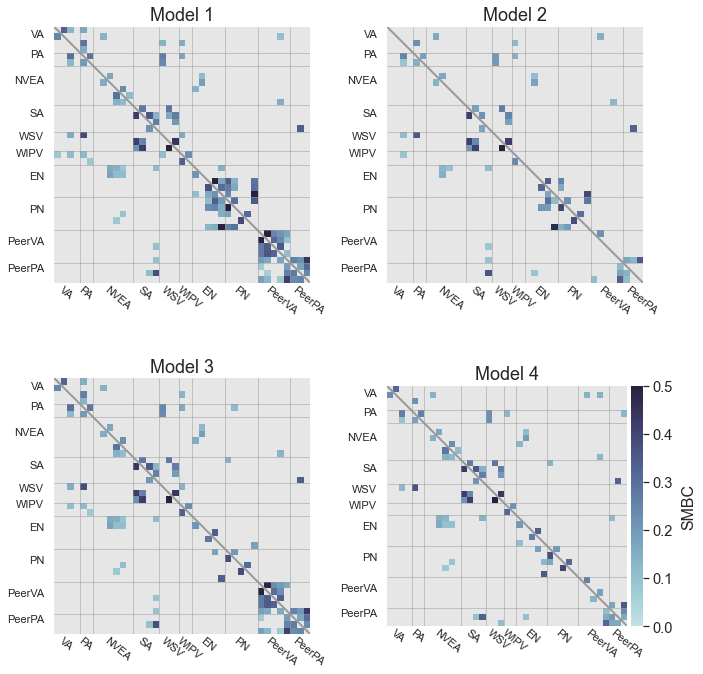

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_theme('notebook', style='white', font='sans-serif', font_scale=1.33)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']
models = [1,2,3,4]

## Define labels.
titles = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

## Define color palette.
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

## Define item order.
order = dict(
    VA = [0, 1, 2, 3], 
    PA = [5, 6], 
    NVEA = [4, 26, 27, 34, 35, 36], 
    SA = [7, 8, 12, 23], 
    WSV = [9, 10, 11], 
    WIPV = [13, 14], 
    EN = [24, 25, 28, 29, 38], 
    PN = [30, 31, 32, 33, 37], 
    PeerVA = [15, 16, 17, 18, 19], 
    PeerPA = [20, 21, 22]
)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

## Define tick positions.
lengths = [len(v) for v in order.values()]
ticks = [j/2 + np.sum(lengths[:i]) - 1.5 for i, j in enumerate(lengths)]

Q3 = read_csv('stan_results/Q3.csv')
ix = np.concatenate(list(order.values()))

## Main loop.
for j, (ax, m) in enumerate(zip(axes.flatten(), models)):
    
    ## Construct SMBC matrix. 
    smbc = np.zeros((ix.max()+1, ix.max()+1))
    for i, study in enumerate(studies):  
        
        ## Preallocate space.
        tmp = np.zeros_like(smbc)
        
        ## Load posterior predictive model check.
        df = read_csv(os.path.join('stan_results', study, f'grmq_m{m}_ppmc2.csv')).tail(-1)
        
        ## Populate matrix.
        tmp[df.k1, df.k2] = tmp[df.k2, df.k1] = np.where(df.pval > thresh, df.obs, 0)
        
        ## Reorganize rows / columns.
        tmp = tmp[ix][:,ix]
        
        ## Store.
        if i: smbc += np.triu(tmp)
        else: smbc += np.tril(tmp)
            
    ## Handle colorbar.
    if m == models[-1]:
        cbar = True
        divider = make_axes_locatable(ax)
        cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
    else: 
        cbar = False
        cbar_ax = None
            
    ## Plot background tiles. 
    sns.heatmap(np.identity(len(smbc)), cmap=ListedColormap(['0.9','0.9']), 
                square=True, cbar=False, ax=ax)
            
    ## Plot SMBC.
    sns.heatmap(smbc, cmap=cmap, vmin=0.0, vmax=0.5, cbar=cbar, mask=smbc==0, square=True,
                xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cbar_ax)
    
    ## Draw boundary lines.
    ax.plot([0,40], [0,40], color='0.6', lw=2)
    for k in np.cumsum([len(v) for v in order.values()]): 
        ax.axhline(k, color='0.6', lw=0.5)
        ax.axvline(k, color='0.6', lw=0.5)
        
    ## Add details.
    ax.set(xticks=ticks, yticks=ticks)
    ax.set_xticklabels(order.keys(), ha='left', fontsize=11, rotation=-40)
    ax.set_yticklabels(order.keys(), va='top', fontsize=11, rotation=0)
    ax.tick_params(axis='x', which='major', pad=-5)
    ax.set_title(titles[j], fontsize=18)
    
    ## Update colorbar.
    if cbar:
        cbar = ax.collections[1].colorbar
        cbar.set_label(r'SMBC', labelpad=8)
        
plt.tight_layout()
# plt.savefig(os.path.join('..', 'figures', 'fig01.png'), dpi=100)

## Q3

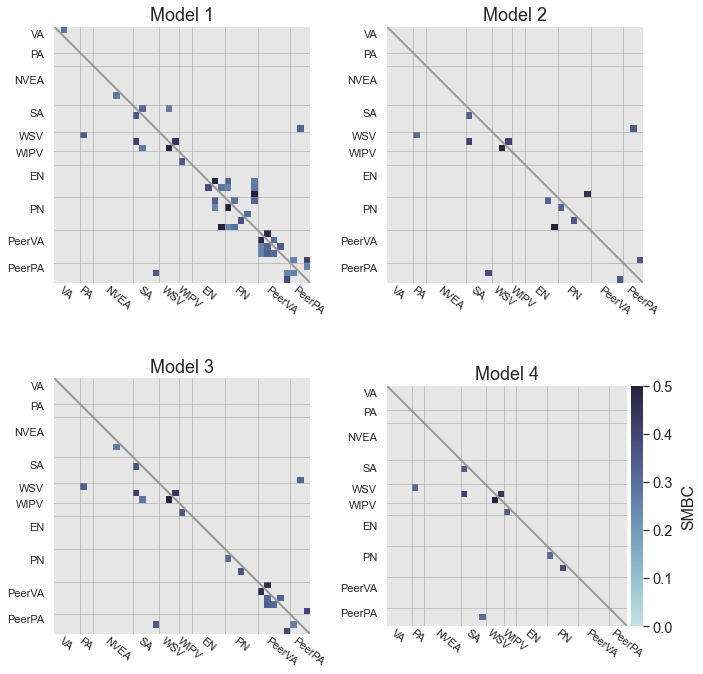

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_theme('notebook', style='white', font='sans-serif', font_scale=1.33)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']
models = [1,2,3,4]

## Define threshold.
thresh = 0.99

## Define labels.
titles = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

## Define color palette.
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

## Define item order.
order = dict(
    VA = [0, 1, 2, 3], 
    PA = [5, 6], 
    NVEA = [4, 26, 27, 34, 35, 36], 
    SA = [7, 8, 12, 23], 
    WSV = [9, 10, 11], 
    WIPV = [13, 14], 
    EN = [24, 25, 28, 29, 38], 
    PN = [30, 31, 32, 33, 37], 
    PeerVA = [15, 16, 17, 18, 19], 
    PeerPA = [20, 21, 22]
)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

## Define tick positions.
lengths = [len(v) for v in order.values()]
ticks = [j/2 + np.sum(lengths[:i]) - 1.5 for i, j in enumerate(lengths)]

## Main loop.
ix = np.concatenate(list(order.values()))
for j, (ax, m) in enumerate(zip(axes.flatten(), models)):
    
    ## Construct SMBC matrix. 
    smbc = np.zeros((ix.max()+1, ix.max()+1))
    for i, study in enumerate(studies):  
        
        ## Preallocate space.
        tmp = np.zeros_like(smbc)
        
        ## Load posterior predictive model check.
        df = Q3.query(f'study == "{study}" and model == {m}')
        
        ## Populate matrix.
        tmp[df.k1, df.k2] = tmp[df.k2, df.k1] = np.where(df.Q3 > df.Q3_99.max(), df.Q3, 0)
        
        ## Reorganize rows / columns.
        tmp = tmp[ix][:,ix]
        
        ## Store.
        if i: smbc += np.triu(tmp)
        else: smbc += np.tril(tmp)
            
    ## Handle colorbar.
    if m == models[-1]:
        cbar = True
        divider = make_axes_locatable(ax)
        cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
    else: 
        cbar = False
        cbar_ax = None
            
    ## Plot background tiles. 
    sns.heatmap(np.identity(len(smbc)), cmap=ListedColormap(['0.9','0.9']), 
                square=True, cbar=False, ax=ax)
            
    ## Plot SMBC.
    sns.heatmap(smbc, cmap=cmap, vmin=0.0, vmax=0.5, cbar=cbar, mask=smbc==0, square=True,
                xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cbar_ax)
    
    ## Draw boundary lines.
    ax.plot([0,40], [0,40], color='0.6', lw=2)
    for k in np.cumsum([len(v) for v in order.values()]): 
        ax.axhline(k, color='0.6', lw=0.5)
        ax.axvline(k, color='0.6', lw=0.5)
        
    ## Add details.
    ax.set(xticks=ticks, yticks=ticks)
    ax.set_xticklabels(order.keys(), ha='left', fontsize=11, rotation=-40)
    ax.set_yticklabels(order.keys(), va='top', fontsize=11, rotation=0)
    ax.tick_params(axis='x', which='major', pad=-5)
    ax.set_title(titles[j], fontsize=18)
    
    ## Update colorbar.
    if cbar:
        cbar = ax.collections[1].colorbar
        cbar.set_label(r'SMBC', labelpad=8)
        
plt.tight_layout()
# plt.savefig(os.path.join('..', 'figures', 'fig01.png'), dpi=100)